In [1]:
# %load ../exp/exp223.py
%matplotlib inline
import os
import sys
from pacological.hh import gain
import matplotlib.pyplot as plt; plt.ion()
import numpy as np
from joblib import Parallel, delayed
from convenience.numpy import save_hdfz, load_hdfz

# First attempts at FI standards

- Exp224
    * `0X`, `1X`
    * with and without `w_m`

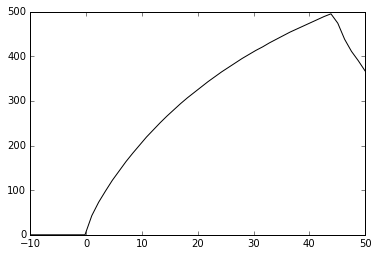

In [12]:
dat = load_hdfz('../data/exp224/r0_wm0.hdf5')
rates = dat['rate']
Is = dat['Is']

sel = np.logical_and(Is < 10, Is > 0)
# plt.plot(Is[sel], rates[sel], color='k')
plt.plot(Is, rates, color='k')

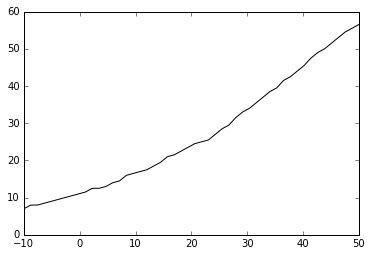

In [11]:
dat = load_hdfz('../data/exp224/r400_wm0.hdf5')
rates = dat['rate']
Is = dat['Is']

plt.plot(Is, rates, color='k')

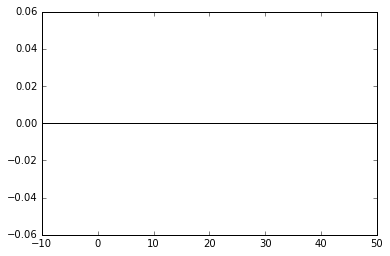

In [5]:
dat = load_hdfz('../data/exp224/r0_wm60.hdf5')
rates = dat['rate']
Is = dat['Is']

plt.plot(Is, rates, color='k')

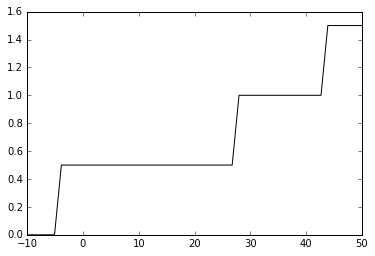

In [6]:
dat = load_hdfz('../data/exp224/r400_wm60.hdf5')
rates = dat['rate']
Is = dat['Is']

plt.plot(Is, rates, color='k')

# FI again, 1X sampled over a wide range of I

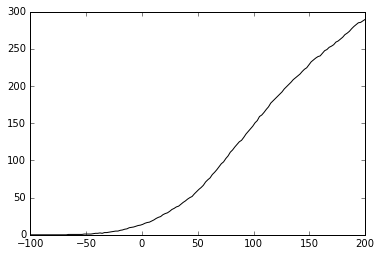

In [13]:
dat = load_hdfz('../data/exp225/r400_wm0.hdf5')
rates = dat['rate']
Is = dat['Is']

plt.plot(Is, rates, color='k')

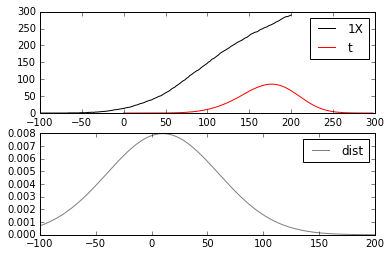

In [80]:
# Try a conv
dat = load_hdfz('../data/exp225/r400_wm0.hdf5')
rates = dat['rate']
Is = dat['Is']

# --
from pacological.zandt import Idist
Id = Idist(Is, 10, 50)
rates_t = np.convolve(Id, rates)

plt.figure()
plt.subplot(211)
plt.plot(Is, rates, color='k', label='1X')
plt.plot(rates_t, color='r', label='t')
plt.legend()

plt.subplot(212)
plt.plot(Is, Id, color='grey', label='dist')
plt.legend()

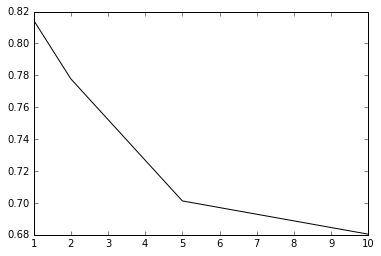

In [67]:
dat = load_hdfz('../data/exp225/r400_wm0.hdf5')
rates = dat['rate']
Is = dat['Is']

vals = []
sds = [1, 2, 5, 10]
I = 10

for sd in sds:
    Id = Idist(Is, I, sd)
    vals.append(np.trapz(Id, rates))

plt.plot(sds, vals, color='k')

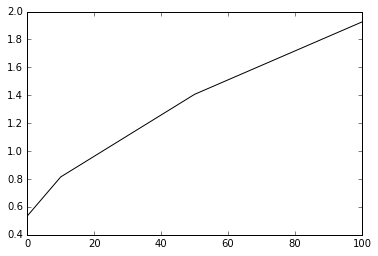

In [69]:
dat = load_hdfz('../data/exp225/r400_wm0.hdf5')
rates = dat['rate']
Is = dat['Is']

vals = []
sd = 1
Ius = [0, 10, 50, 100]

for Iu in Ius:
    Id = Idist(Is, Iu, sd)
    vals.append(np.trapz(Id, rates))

plt.plot(Ius, vals, color='k')